### Lab | Hypothesis Testing

#### Instructions

It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

* Set up the hypothesis test.

* Write down all the steps followed for setting up the test. 

* Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

* We will have another simple example on two sample t test. But this time this is a one sided t-test In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file Data/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

In [71]:
# Importing libraries

import numpy as np
import pandas as pd
import scipy.stats as stats

##### Hypothesis testing workflow:

1. Identify population parameter that is hypothesized about.
2. Specify the null and alternative hypothesis.
3. Determine (standardized) test statistic and corresponding null distribution.
4. Conduct hypothesis test in Python.
5. Measure evidence against the null hypothesis.
6. Make a decision comparing evidence to significance level.
7. Interpret the results in the context of the original problem.

In [3]:
# 1. The sample size is 100, which is > 30, meaning it's a normal distribution.

In [4]:
# 2. The hypotheses:

$$H_0$$ - The mean systolic blood pressure _is_ μ = 120 mm Hg.

$$H_a$$ - 
The mean systolic blood pressure (sample) is _greater_ than μ = 120 mm Hg.

_The test statistic_:

- x̄ = sample mean 
- μ is the population mean
- σ is the population standard deviation
- n is the sample size

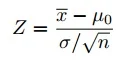


In [8]:
# 3,4. test statistic

sample_mean = 130.1
pop_mean = 120
pop_std_dev = 21.21

z = ( sample_mean - pop_mean ) / ( pop_std_dev / np.sqrt(100) )
print("The z score is: {:.5f}".format(z))

The z score is: 4.76190


Set confidence level to 95 per cent, or $\alpha = 1 - 0.95 = 0.05$

In [5]:
# 5. 
# If p-value > alpha: Fail to reject the null hypothesis (i.e. not significant result).
# If p-value <= alpha: Reject the null hypothesis (i.e. significant result)

In [10]:
zc = stats.norm.ppf(0.95) # 0.95 is the confidence level.
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 1.64


6. 

Compare the z-score with the z-critical value: zc:

z = 4.76 > zc = 1.64

We reject the null hypothesis.

###### Second example: 2 sample _t_ test

In [81]:
# load data

data = pd.read_csv('Data_Machine.csv')

 Hypotheses:

$$H_0$$ - The average speed of the machines is equal.

$$H_a$$ - The new machine will pack faster on the average than the old one (two-tailed).

##### T-score (two populations)
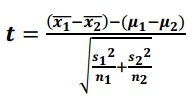

In [82]:
# for small samples (<50) we use t-statistics

data.head(5)

,New Machine,Old Machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5


In [83]:
data.describe()

,New Machine,Old Machine
count,10.000000,10.000000
mean,42.140000,43.230000
std,0.683455,0.749889
min,41.000000,41.700000
25%,41.800000,42.800000
50%,42.200000,43.400000
75%,42.625000,43.750000
max,43.200000,44.100000


In [84]:
old = data['Old Machine']

In [85]:
new = data['New Machine']

In [86]:
# calculate mean and standard deviation of samples

mean_old = np.mean(data['Old Machine'])

In [87]:
mean_new = np.mean(data['New Machine'])

In [88]:
std_old = np.std(data['Old Machine'])

In [89]:
std_new = np.std(data['New Machine'])

In [119]:
# Calculate the T-test 

t = (mean_old - mean_new) / np.sqrt((std_old **2)/10 + (std_new **2)/10)

print("Our t statistic is: {:.4f}".format(t))

Our t statistic is: 3.5810


In [120]:
t = stats.ttest_ind(old, new, equal_var = True)

In [121]:
t # slightly different result?

Ttest_indResult(statistic=3.3972307061176026, pvalue=0.0032111425007745158)

The number of degrees of freedom for an entire table or set of columns, is df = (r-1) x (c-1), where r is the number of rows, and c the number of columns.

In [113]:
# for 95% confidence interval, alpha = 5% = 0.05 and alpha/2 = 0.025

df = (len(data)-1) * 2
tc = stats.t.ppf(1-(0.05/2),df = 18)

print("The tc critical value is: {:.5f}".format(tc))

The tc critical value is: 2.10092


If the absolute value of the t-value is greater than the critical value, we reject the null hypothesis. 